In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# constants
INITIAL_POPULATION: int = 150  # initial population
BETA: float = 0.5  # infection rate
GAMMA: float = 0.1  # recovery rate

MI_0: float = 0.2  # transmission of good news
LAMBDA_1: float = 0.01  # exogenous infection rate

INITIAL_INFECTED: int = 10
INITIAL_SUSCEPTIBLE: int = INITIAL_POPULATION - INITIAL_INFECTED
TIME_GRID = np.linspace(start=0, stop=50, num=50)


In [ ]:
def plot(system_condition):
    susceptible, infected = system_condition
    fig = plt.gcf()
    fig.set_size_inches(15, 5)
    plt.plot(TIME_GRID, susceptible, "g", label="S(t)")
    plt.plot(TIME_GRID, infected, 'r', label="I(t)")
    plt.legend()
    plt.show()

In [ ]:
# The SIS model differential equations with extra rates
def alt_derivative(system_condition, t):
    susceptible, infected = system_condition
    susceptible_dif_derivative: float = (-BETA * susceptible * infected / INITIAL_POPULATION) + (
            GAMMA * infected) + (MI_0 * susceptible * infected / INITIAL_POPULATION) - (
                                                LAMBDA_1 * susceptible)  # derivative of S(t)
    infected_dif_derivative: float = (BETA * susceptible * infected / INITIAL_POPULATION) - (
            GAMMA * infected) - (MI_0 * susceptible * infected / INITIAL_POPULATION) + (
                                             LAMBDA_1 * susceptible)  # derivative of I(t)

    return [susceptible_dif_derivative, infected_dif_derivative]

In [ ]:
# The SIS model differential equations
def derivative(system_condition, t):
    susceptible, infected = system_condition
    susceptible_dif_derivative: float = (-BETA * susceptible * infected / INITIAL_POPULATION) + (
            GAMMA * infected)  # derivative of S(t)
    infected_dif_derivative: float = (BETA * susceptible * infected / INITIAL_POPULATION) - (
            GAMMA * infected)  # derivative of I(t)

    return [susceptible_dif_derivative, infected_dif_derivative]

In [ ]:
def simple_ode_solution():
    initial_condition: list[int] = [INITIAL_SUSCEPTIBLE, INITIAL_INFECTED]

    # Integrate the SIS equations over the time grid .
    y = odeint(derivative, initial_condition, TIME_GRID)

    susceptible = y[:, 0]
    infected = y[:, 1]

    return [susceptible, infected]

In [ ]:
def alt_ode_solution():
    initial_condition: list[int] = [INITIAL_SUSCEPTIBLE, INITIAL_INFECTED]

    # Integrate the SIS equations over the time grid .
    y = odeint(alt_derivative, initial_condition, TIME_GRID)

    susceptible = y[:, 0]
    infected = y[:, 1]

    return [susceptible, infected]

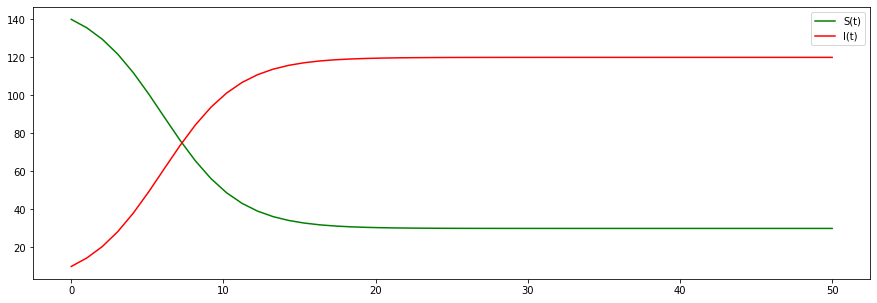

In [ ]:
plot(simple_ode_solution())

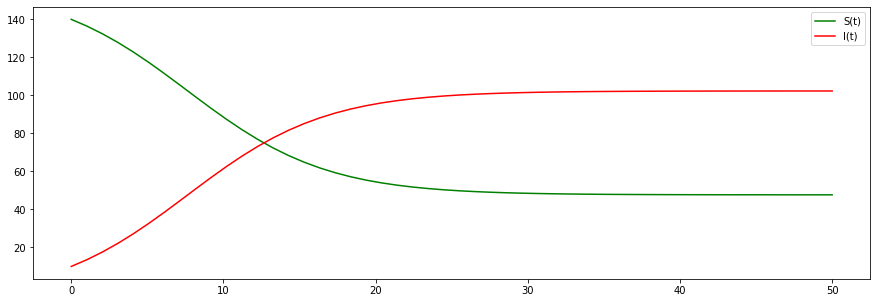

In [ ]:
plot(alt_ode_solution())